<a href="https://colab.research.google.com/github/nygulzehra/MTA-Dataset/blob/main/MTA_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = "center"><strong>MTA Verilerinden Ile En Kalabalik Metro Istasyonunu Bulma</strong></h1>



<hr align="center">



<p>Oncelikle Python'un verisetleri ile calismamiza kolaylik saglayacak Pandas kutuphanesini ekleyerek basliyoruz.</p>

In [1]:
import pandas as pd

<p>Uzerinde calisacagimiz veri dosyamizi (burda csv dosyasi) DataFrame'e donusturuyor ve <strong>.info()</strong> fonksiyonu ile verisetimiz hakkinda bilgi ediniyoruz.</p>

<p>df olarak tanimladigimiz DataFrame 'miz 11 sutun , 211,707 satirdan olusuyor ve bos veri yok. </p>

In [16]:
df = pd.read_csv('turnstile_220528.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211707 entries, 0 to 211706
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   211707 non-null  object
 1   UNIT                                                                  211707 non-null  object
 2   SCP                                                                   211707 non-null  object
 3   STATION                                                               211707 non-null  object
 4   LINENAME                                                              211707 non-null  object
 5   DIVISION                                                              211707 non-null  object
 6   DATE                                                                  211707 non-null  objec

<p><strong>.head()</strong> ile ilk 5 , <strong>.tail()</strong> ile son 5 kayda ulasip DataFrame'mimizde ne tur verilerin olduguna bakiyoruz.</p>

In [18]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,00:00:00,REGULAR,7714568,2706545
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,04:00:00,REGULAR,7714583,2706554
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,08:00:00,REGULAR,7714590,2706575
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,12:00:00,REGULAR,7714641,2706648
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,16:00:00,REGULAR,7714728,2706690


<p>Bizden en yogun metro istasyonu bilgisi istendiginden  verisetimizdeki ayni turnikelere (59. Cadde'de NQR456W tren hatlarinda yer alan) ait bir gunluk EXITS ve ENTRIES sutunlarini gormek istiyoruz. Bu sekilde nasil bir hesaplama yapildigi hakkinda fikir edinmis olacagiz.</p>

In [4]:
df_grp = df[(df['C/A'] == 'A002')& (df.UNIT=='R051')& (df.SCP == '02-00-00')& (df.STATION=='59 ST')& (df.LINENAME=='NQR456W')& (df.DIVISION=='BMT')]

In [19]:
df_grp.head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,00:00:00,REGULAR,7714568,2706545
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,04:00:00,REGULAR,7714583,2706554
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,08:00:00,REGULAR,7714590,2706575
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,12:00:00,REGULAR,7714641,2706648
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,16:00:00,REGULAR,7714728,2706690
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/21/2022,20:00:00,REGULAR,7714857,2706716
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/22/2022,00:00:00,REGULAR,7714919,2706737


<p>Anyi istasyondaki turnikelere ait veriler 4 saatlik zaman araliklariyla ayri bir kayit olarak kaydedilmis. </p>

<p>Goruldugu uzere ENTRIES ve EXITS sutunlarindaki rakamlar bir sonraki gune gectigimizde sifirlanmiyor, onceki gunden rakamlarin uzerine yazilmaya devam ediliyor.</p>

In [20]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

<p><strong>.columns</strong> komutuyla sutun isimlerimize ulastik. Bir sey dikkatinizi cekmis olmali. EXITS ifadesinden hemen sonra olmasi gereken ' isareti (tek tirnak)  olmasi gereken yerde degil. </p>

In [21]:
df.EXITS.head()

AttributeError: ignored

<p>Sonunda yeralan bosluklardan oturu EXITS sutununa ulasamiyoruz . Yolumuza sutun ismini degistirerek devam edecegiz. Bu islem icin <strong>.rename() </strong>fonksiyonunu kullaniyoruz.</p>

In [6]:
df.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)

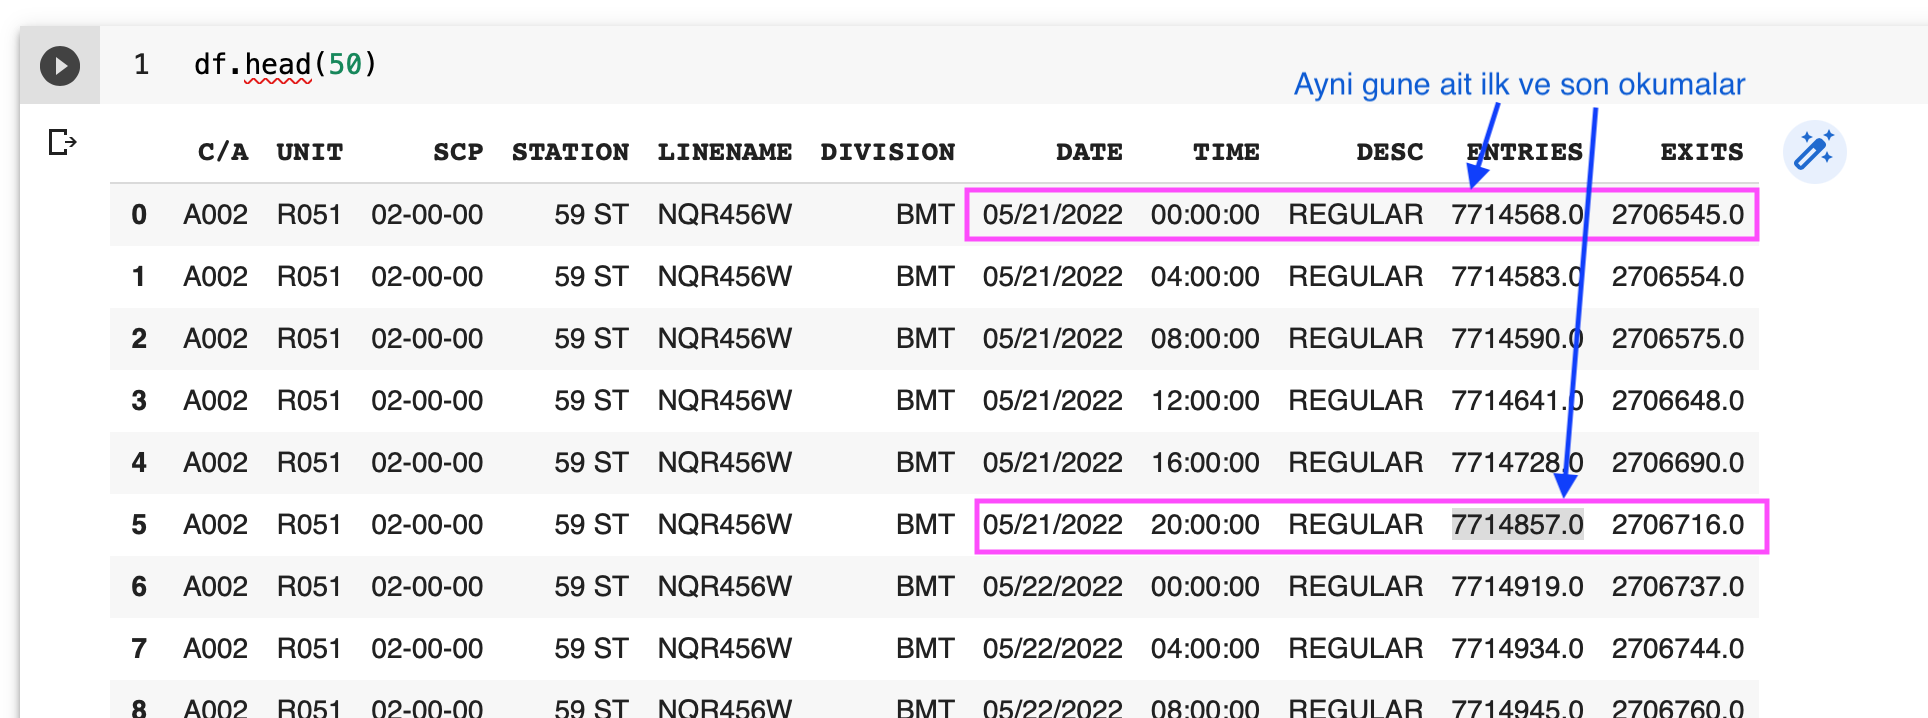

<p>Gercek <em><strong>EXITS</strong></em> ve <em><strong>ENTRIES</strong></em> verilerine ulasabilmek icin ayni gun icindeki acilis ve kapanis kayitlarina ulasip aradaki farki almamiz gerekiyor. Bunu datasetimizdeki tum veriler icin tek tek yapmamizi kolaylastiracek bir fonksiyon tanimladik <strong><em>Calculate</em></strong> fonksiyonu ile ayni istasyondaki ayni gune ait tum verileri alip en buyuk degerden en kucuk degeri cikarip elde ettigi veriyi yeni tanimladigimiz df_total_ext_ext DataFrame' mimize yeni <em><strong>EXITS</strong></em> ve <em><strong>ENTRIES</strong></em> verilerimiz olarak yazacak.</p>

In [7]:
def calculate(Series):
  
    new_value = Series.max() - Series.min()

    return new_value

<p><strong>.groupby()</strong> fonksiyonu ile gruplamasini istedigimiz sutun isimlerimizi belirttik ve arkasindan <strong>.agg()</strong> fonksiyonu ile EXITS veENTRIES sutunlari icin yapmasini istedigimiz islemi belirttik. 

In [8]:
df_total_ent_ext = df.groupby(['C/A',	'UNIT',	'SCP',	'STATION',	'LINENAME',	'DIVISION',	'DATE']).agg({'ENTRIES':calculate, 'EXITS':calculate})

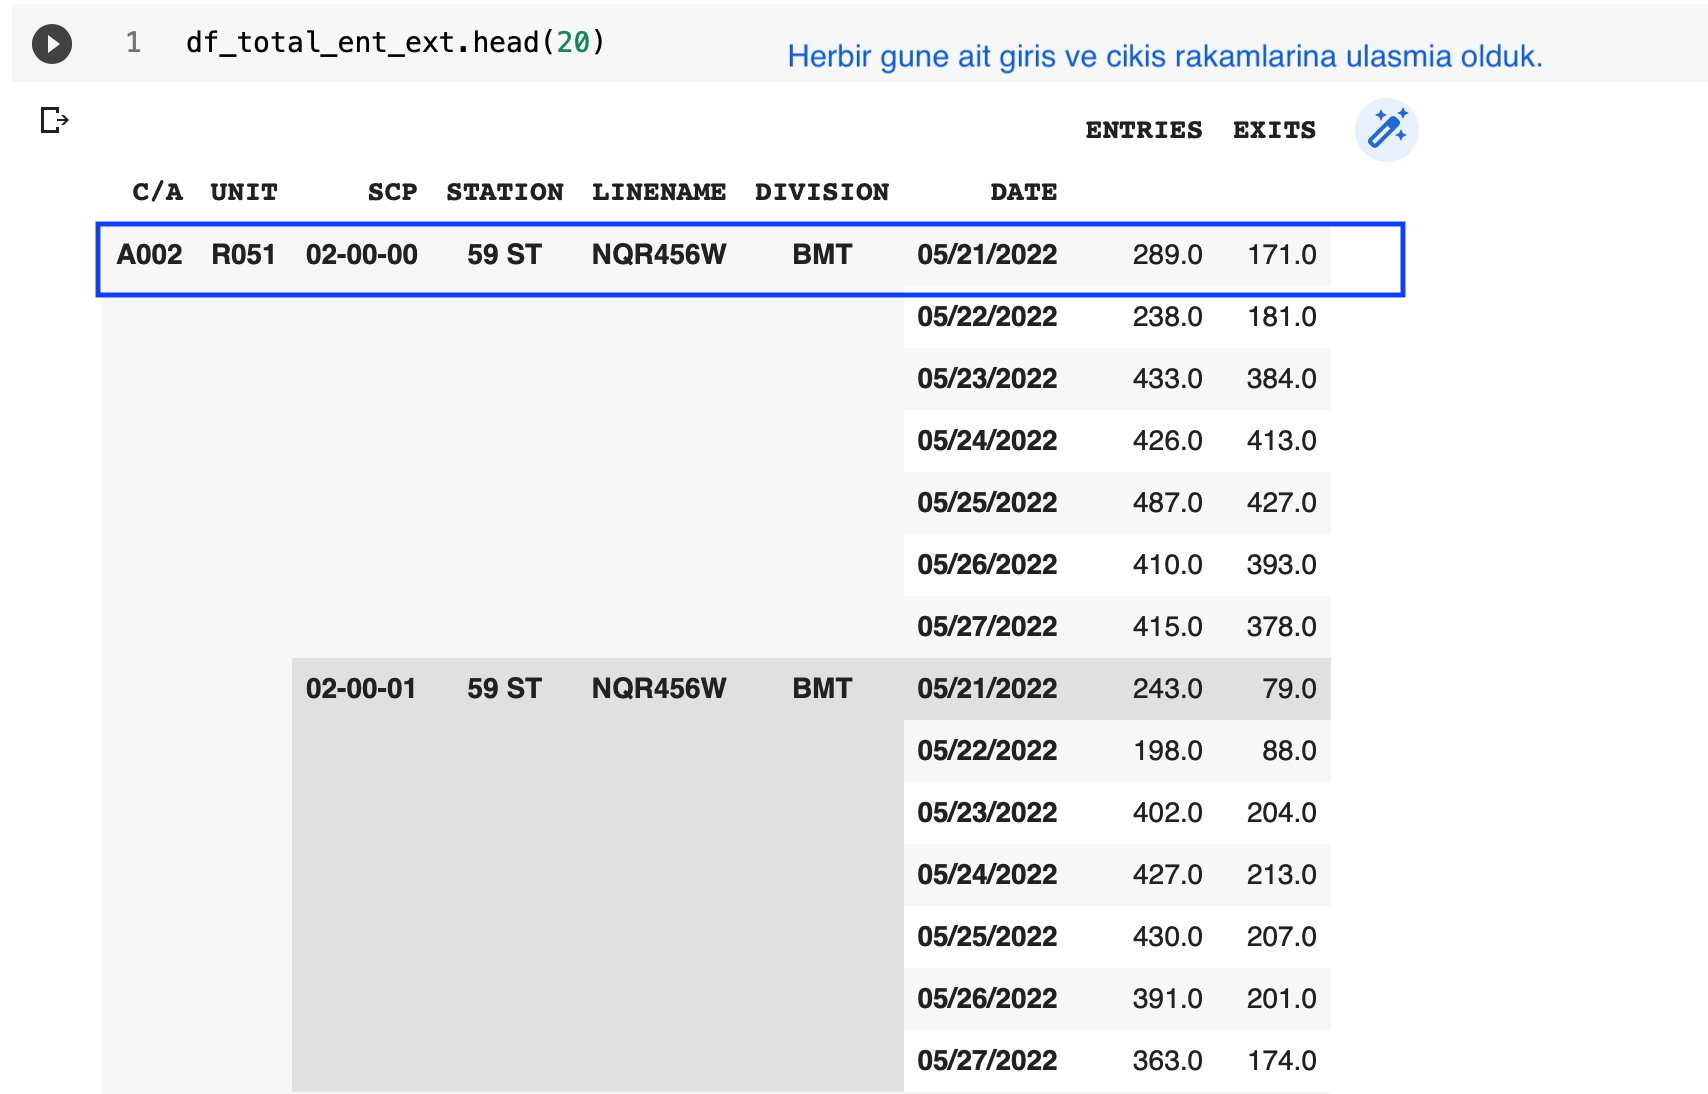

<p><strong>.rename() </strong>fonksiyonu ile sutun isimlerimizi DAILY_EXITS ve DAILY_ENTRIES olarak degistirdik. <strong>inplace=True</strong> ifadesi ile de kalici hale getirdik. </p>
<p>Yeni verisetimize ait ilk 5 ve son 5 kayir asagidaki gibidir.</p>

In [23]:
df_total_ent_ext.rename(columns={'EXITS': 'DAILY_EXITS', 'ENTRIES':'DAILY_ENTRIES'}, inplace=True)
df_total_ent_ext.head()

DAILY_ENTRIES  \
C/A  UNIT SCP      STATION LINENAME DIVISION DATE                        
A002 R051 02-00-00 59 ST   NQR456W  BMT      05/21/2022            289   
                                             05/22/2022            238   
                                             05/23/2022            433   
                                             05/24/2022            426   
                                             05/25/2022            487   

                                                         DAILY_EXITS  
C/A  UNIT SCP      STATION LINENAME DIVISION DATE                     
A002 R051 02-00-00 59 ST   NQR456W  BMT      05/21/2022          171  
                                             05/22/2022          181  
                                             05/23/2022          384  
                                             05/24/2022          413  
                                             05/25/2022          427

<p>Verisetini csv dosya olarak kaydetmek icin <strong>.to_csv </strong>fonksiyonunu kullaniyoruz.</p>

In [11]:
df_total_ent_ext.to_csv('total_ent_ext.csv')